# Installing libraries

In [3]:
# If this cell does not work, run the next cell instead.
!pip install -r requirements.txt


  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.0
    Uninstalling matplotlib-3.5.0:
      Successfully uninstalled matplotlib-3.5.0
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.9.2
    Uninstalling wordcloud-1.9.2:
      Successfully uninstalled wordcloud-1.9.2
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2



You should consider upgrading via the 'C:\Users\Admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
# Run this cell if the cell above did not work
# !pip install pandas matplotlib seaborn wordcloud datasets

# Importing libraries & Combining the dataset

In [5]:
import re
from datasets import load_dataset
import seaborn as sns
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer


In [6]:
nltk.download('punkt') # Required for the tokenization library
nltk.download('stopwords') # Required to obtain the stop words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
'''
Dataset information:
- labels:
    0: "hate-speech"
    1: "offensive-speech"
    2: "neither"
- tweet: string
'''

dataset = load_dataset('badmatr11x/hate-offensive-speech') #downloading the dataset from Hugging Face

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/51070 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2838 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2837 [00:00<?, ? examples/s]

In [8]:
df1 = pd.DataFrame(dataset['train'])
df1

,label,tweet
0,2,where's his other half??? i want to indulge my...
1,2,easier for barrack hussein obama to blame guns...
2,2,As soon as a Democrat gets a chance to ? the p...
3,1,GOOD Music &gt;&gt;&gt;&gt;&gt; Young Money fags
4,2,mass shooting at orlando gay nightclub: what w...
...,...,...
51065,0,"@user ultimately, a #joke from early #2016 tha..."
51066,2,#vehicle gorilla simulator: you need to do t...
51067,2,"honey, i got nothing to lose.. &lt;3 #love #su..."
51068,2,#crookedhilary #imwither -not! #hillary #hilla...


In [9]:
df2 = pd.DataFrame(dataset['test'])
df2

,label,tweet
0,1,That boy has always been a pussy never been a ...
1,1,RT @koleworld4: every time i come out im never...
2,1,Ayee hoe
3,2,wasn't i supposed 2 saveð..but then i thoug...
4,1,hahaha my girl just popped on a bitch like a M...
...,...,...
2832,2,"@NG5_ Thirsty Giants are always like ""ho, ho, ho"""
2833,1,Ahmed's moms bomb pussy&gt;&gt;&gt;
2834,2,staing my new job on monday..... ...
2835,1,Nd these hoes all kno I'm workin wit a 9 I ain...


In [10]:
df3 = pd.DataFrame(dataset['validation'])
df3

,label,tweet
0,2,"mashed potatoes , string beans , yellow rice ,..."
1,2,best of soundtrack #best #bestoftheday #gameof...
2,1,I'll still let the plastic bitch do her dollar...
3,2,&#8220;@SexualMedic: How I feel when I'm throw...
4,2,@ImSooooMad guess who's eating cracker b witho...
...,...,...
2833,2,@CruzanChoklate look at you with yellow fever.
2834,1,RT @BelowThaaBelt_: Snip snip hoe
2835,1,Who the hell taught you how to fuck bitch toot...
2836,1,&#8220;@NeiAllure: &amp; you should feel disre...


In [11]:
#concatenate 'train', 'validation', and 'test' dataframes
dataset_concat = pd.concat([df1, df2])
dataset_concat = pd.concat([dataset_concat, df3])
df = dataset_concat.copy()
df

,label,tweet
0,2,where's his other half??? i want to indulge my...
1,2,easier for barrack hussein obama to blame guns...
2,2,As soon as a Democrat gets a chance to ? the p...
3,1,GOOD Music &gt;&gt;&gt;&gt;&gt; Young Money fags
4,2,mass shooting at orlando gay nightclub: what w...
...,...,...
2833,2,@CruzanChoklate look at you with yellow fever.
2834,1,RT @BelowThaaBelt_: Snip snip hoe
2835,1,Who the hell taught you how to fuck bitch toot...
2836,1,&#8220;@NeiAllure: &amp; you should feel disre...


# EDA

In [12]:
# Display basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56745 entries, 0 to 2837
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   56745 non-null  int64 
 1   tweet   56745 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [13]:
# Display summary statistics
df.describe()

,label
count,56745.000000
mean,1.532399
std,0.615124
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [14]:
# Check missing values
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [15]:
# Count the number of each class
class_counts = df['label'].value_counts()
class_counts

label
2    33883
1    19190
0     3672
Name: count, dtype: int64

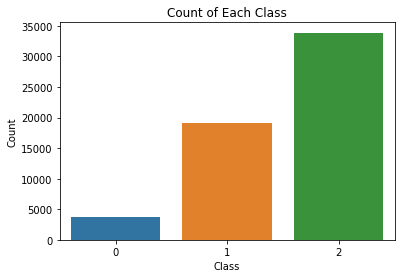

In [16]:
# Visualize the count of each class in a bar plot
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Count of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The dataset appears to be imbalanced, meaning that some classes may have significantly more observations than others. To address this issue, we will apply a down-sampling technique.



# Data downsampling

In [17]:
# Perform the downsampling
df_downsample = pd.concat([df[df['label']==2].sample(3672, random_state=42),
                       df[df['label']==1].sample(3672, random_state=42),
                       df[df['label']==0].sample(3672, random_state=42)])
df_downsample.groupby('label').count()

,tweet
label,
0,3672
1,3672
2,3672


# Preprocessing

In [18]:
# Inputs the original tweet from the dataset & Returns a cleaned tweet as a string
def cleaning(tweet):

  tweet = tweet.lower() # convert text to lowercase
  tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet) # remove URLs starting at the beginning of the text
  tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet) # remove URLs in the middle of the text
  tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet) # remove URLs at the end of the text
  # expand contractions
  tweet = re.sub(r"that's","that is",tweet)
  tweet = re.sub(r"there's","there is",tweet)
  tweet = re.sub(r"what's","what is",tweet)
  tweet = re.sub(r"where's","where is",tweet)
  tweet = re.sub(r"it's","it is",tweet)
  tweet = re.sub(r"who's","who is",tweet)
  tweet = re.sub(r"i'm","i am",tweet)
  tweet = re.sub(r"she's","she is",tweet)
  tweet = re.sub(r"he's","he is",tweet)
  tweet = re.sub(r"they're","they are",tweet)
  tweet = re.sub(r"who're","who are",tweet)
  tweet = re.sub(r"ain't","am not",tweet)
  tweet = re.sub(r"wouldn't","would not",tweet)
  tweet = re.sub(r"shouldn't","should not",tweet)
  tweet = re.sub(r"can't","can not",tweet)
  tweet = re.sub(r"couldn't","could not",tweet)
  tweet = re.sub(r"won't","will not",tweet)
  tweet = re.sub(r"\W"," ",tweet) # remove non-word characters (punctuation)
  tweet = re.sub(r"\d"," ",tweet) # remove digits
  tweet = re.sub(r'^(user\s*)+', '', tweet) # does not work as expected, remove 'user' at the beginning of the text (multiple occurrences)
  tweet = re.sub(r"^(rt\s+)+"," ",tweet) # remove 'rt' at the beginning of the text (multiple occurrences)
  tweet = re.sub(r"\s+[a-z]\s+"," ",tweet) # remove single characters in the middle of the text surrounded by spaces
  tweet = re.sub(r"\s+[a-z]$"," ",tweet) # remove single characters at the end of the text surrounded by spaces
  tweet = re.sub(r"^[a-z]\s+"," ",tweet) # remove single characters at the beginning of the text surrounded by spaces
  tweet = re.sub(r"\[[0-9]*\]"," ",tweet) # remove square brackets and numbers inside them
  tweet = re.sub(r"\s+gt"," ",tweet) # remove 'gt' after a space
  tweet = re.sub(r'[^A-Za-z0-9 ]+','',tweet) # remove all characters except letters, numbers and spaces
  return tweet

# Inputs a list of words & Returns a string of words after removing the stop words
def stop_words(words):
    combinedWords = [word for word in words if word not in (stopWords)]
    return combinedWords

# Inputs the tweet & Returns a list of tokenized words
def tokenize(tweet):
    words = nltk.word_tokenize(tweet)
    return words

#
stemmer = PorterStemmer()
def stemming(tweet):
  stemmed_words = [stemmer.stem(word) for word in tweet]
  #tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
  return stemmed_words

# Preprocesses, tokenizes, and removes stop words from tweet using the other functions
def finalpreprocess(tweet):
  return stemming(stop_words(tokenize(cleaning(tweet))))

stopWords = stopwords.words('english')
df = df_downsample.copy()
df['tweet'] = df['tweet'].apply(lambda x:finalpreprocess(x))
df.head(10)

,label,tweet
30229,2,"[sunni, iam, posit, affirm]"
45571,2,"[mclaffytaffi, yanke, footbal, funniest, part,..."
39738,2,"[user, one, week, left, take, break, user, tri..."
1995,2,"[truli, day, orlando, america, stop, pray, tim..."
31618,2,"[magic, wed, pay, weddingpay, celebr, bride, g..."
46831,2,"[berpos, holiday, meagain, beauti, withaynk]"
46291,2,"[banski, lebron, turn, til, decemb, made, trip..."
30853,2,"[get, enough, mask, beauti, post, posit, mudma..."
16897,2,"[night, rug, kayla, bellanca, pj, fight, foodo..."
19253,2,"[user, rude, staff, rewari, zeevali, bazar, br..."


# Words Visualization

In [19]:
# Create a function to generate a WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(figsize = (8, 8))

    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

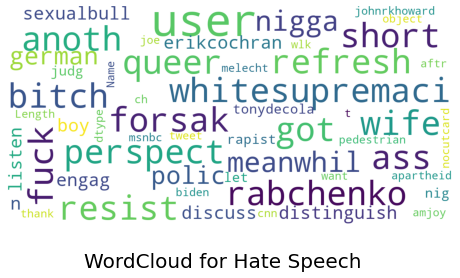

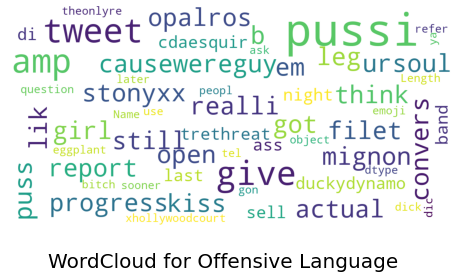

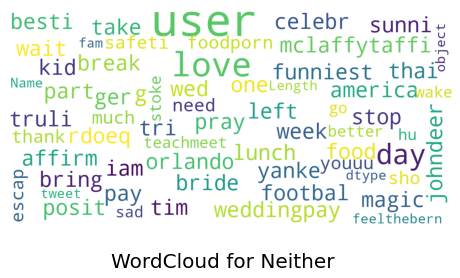

In [20]:
# Generate a WordCloud for each class
##print("WordCloud for Hate Speech:")
show_wordcloud(df[df['label'] == 0]['tweet'],'WordCloud for Hate Speech')

print(" ")
show_wordcloud(df[df['label'] == 1]['tweet'],'WordCloud for Offensive Language')

print(" ")
show_wordcloud(df[df['label'] == 2]['tweet'],'WordCloud for Neither')

# Data Splitting

In [21]:
train_df, _ = train_test_split(df, test_size=0.2, random_state=42)
valid_df, test_df = train_test_split(_, test_size=0.5, random_state=42)
print(f'Traing set size {train_df.shape}')
print(f'Validation set size {valid_df.shape}')
print(f'Testing set size {test_df.shape}')

Traing set size (8812, 2)
Validation set size (1102, 2)
Testing set size (1102, 2)


# Baseline model: Logistic regression

## Classifier1 Using bag-of-words

In [22]:
#Convert the text to a bag-of-words representation
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(train_df['tweet'].astype('U')) # convert to Series
X_test_bow = vectorizer.transform(test_df['tweet'].astype('U')) # convert to Series

y_train = train_df['label']
y_test = test_df['label']

In [23]:
print(vectorizer.get_feature_names_out()[50:100])
print(len(vectorizer.get_feature_names_out())) #so the number of features

['accept' 'access' 'accessnetwork' 'accid' 'accident' 'accord' 'account'
 'accur' 'accus' 'ace' 'acev' 'ach' 'achiev' 'achil' 'ackdoc' 'acknowledg'
 'acl' 'acquir' 'acr' 'across' 'act' 'actin' 'action' 'actionkid' 'activ'
 'activist' 'actor' 'actorslif' 'actress' 'actual' 'ad' 'adam'
 'adamjferraro' 'adamsajith' 'adamsaleh' 'adamsank' 'adapt' 'add'
 'adderal' 'addict' 'addin' 'addit' 'address' 'adept' 'adhjngzvpg' 'adida'
 'adidassho' 'adiwrit' 'adl' 'administr']
15256


In [24]:
df_features = pd.DataFrame(data=X_train_bow.toarray(),columns = vectorizer.get_feature_names_out())
df_features

,aa,aaa,aaaaaaaaand,aaahhhh,aaand,aaliyahhlove,aand,aap,aaronmacgrud,aaronthegoat,...,zwaaad,zwengersierra,zwn,zwr,zxzlhti,zy,zzachbar,zzkagxivlu,zzzentropi,zzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Scales the data to zero mean & unit variance - The model's performance decreases after scaling
# scaler = StandardScaler(with_mean=False)
# X_train_bow = scaler.fit_transform(X_train_bow)
# X_test_bow = scaler.transform(X_test_bow)

# Train a logistic regression classifier
classifier1 = LogisticRegression(max_iter = 100,
                                random_state = 42)
classifier1.fit(X_train_bow,y_train )


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [26]:
# Make predictions on the test set
y_pred_bow = classifier1.predict(X_test_bow)

### Results for Classifier 1 (BOW)

Accuracy: 0.8239564428312159


Text(0.5, 33.0, 'Predicted Values')

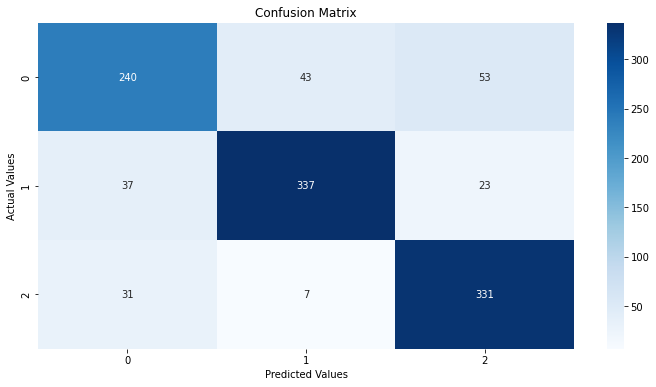

In [27]:
# Evaluate the accuracy & obtain the confusion matrix of the classifier
accuracy = accuracy_score(y_test, y_pred_bow)
print("Accuracy:", accuracy)

cm=confusion_matrix(y_test,y_pred_bow)
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

## Classifier 2 using tf-idf

In [28]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data and transform the data
X_train_tfidf = vectorizer.fit_transform(train_df['tweet'].astype('U'))

# Transform the test data using the fitted vectorizer
X_test_tfidf = vectorizer.transform(test_df['tweet'].astype('U'))

# Get the labels for the training and test data
y_train = train_df['label']
y_test = test_df['label']

In [29]:
# Scales the data to zero mean & unit variance - The model's performance decreases after scaling
# scaler = StandardScaler(with_mean=False)
# X_train_tfidf = scaler.fit_transform(X_train_tfidf)
# X_test_tfidf = scaler.transform(X_test_tfidf)

classifier2 = LogisticRegression(max_iter = 100,
                                random_state = 42)
classifier2.fit(X_train_tfidf,y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [30]:
# Make predictions on the test set
y_pred_tfidf = classifier2.predict(X_test_tfidf)

### Results for Classifier 2 (TF-IDF)

Accuracy: 0.8321234119782214


Text(0.5, 33.0, 'Predicted Values')

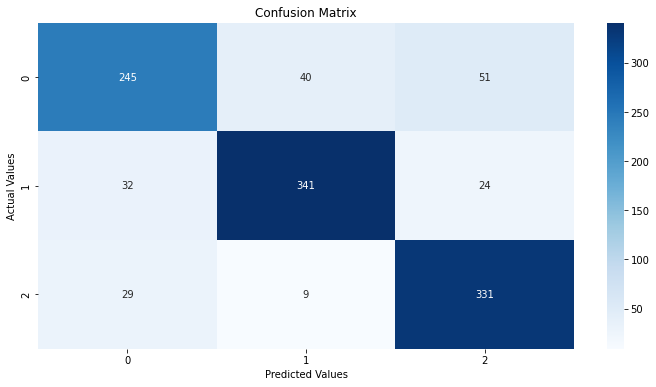

In [31]:
# Evaluate the accuracy & obtain the confusion matrix of the classifier
accuracy = accuracy_score(y_test, y_pred_tfidf)
print("Accuracy:", accuracy)

cm=confusion_matrix(y_test,y_pred_tfidf)
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

# References

### NLP Tutorial for Text Classification in Python.
-- Link: https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e
### How To Implement Logistic Regression Text Classification In Python With Scikit-learn and PyTorch.
-- Link: https://spotintelligence.com/2023/02/22/logistic-regression-text-classification-python/
### Logistic Regression with StandardScaler-From the Scratch
-- Link: https://medium.com/@draj0718/logistic-regression-with-standardscaler-from-the-scratch-ec01def674e8